In [294]:
#「経済・ファイナンスデータの計量時系列分析」のデータを使用　http://www.asakura.co.jp/books/isbn/978-4-254-12792-8/

# 基本のライブラリを読み込む
import numpy as np  #numpy:数値計算用の拡張モジュール
import pandas as pd #pandas:数表および時系列データ用のライブラリ
from scipy import stats
import statsmodels.api as sm #statsmodels:統計モデルの推定だけでなく、統計的検定を実施できるライブラリ

# グラフ描画
from matplotlib import pylab as plt #matplotlib:グラフ描画用ライブラリ
import seaborn as sns #seaborn:グラフ描画用ライブラリ
%matplotlib inline #グラフをインラインで表示（別ウィンドウにしない）
sns.set()

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 #グラフサイズ変更

# 普通にデータを読み込む
dt = pd.read_csv("economicdata.csv",   #ディレクトリはjupyter notebookの場所がデフォルト
                 encoding="SHIFT_JIS", #指定しないと読み込めないことがある様子
                 index_col=0,          #１列目をindexにする　indexはlist配列の中での要素が何番目にあるかを示す数値。for文のrange関数でループ
                 parse_dates=True,     #indexの列をdatetime型にする　（参考）https://qiita.com/sakabe/items/ae1fa47a58c796006627
                 dtype='float64')      #index以外を浮動小数点に　計算で誤差が発生することを前提とした数値データ↔︎固定小数点 https://qiita.com/siruku6/items/27dd9fb84aa84186eda5
dt.head()

iip = dt['indprod_2'] #dtのうち'indprod_2'列をiipと名付ける
#iip.index = dt[[0]]
iip = iip.dropna() # Nanデータ削除（重要）
#arr_iip = np.array(iip) #iipをarrayに

#print(iip) #数値、データ型の出力
#print(iip.index) #iipのindexの出力
#print(arr_iip)

#plt.plot(iip)　#プロット

#valid = ~np.isnan(iip).any(axis=0)　#計算されるが、結果が違う（動きは同じで桁が違う）
#def autocorr_naive_nan(arr_iip):
#    N = len(arr_iip)
#    return np.array([np.nanmean(arr_iip[iSh:] * arr_iip[:N-iSh]) for iSh in range(N)])
#aut_iip = autocorr_naive_nan(arr_iip)
#print(aut_iip)
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.stem(np.arange(364), aut_iip, use_line_collection=True)

import statsmodels.graphics.api as smg
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(iip, lags=362);

iip_acf = sm.tsa.stattools.acf(iip,nlags=363,fft=False)
iip_acf #nanがたくさん

#iip.autocorr(lag=1) #単独の相関係数が出力される

#np.corrcoef(iip[1:-1], iip[4:]) #2*2の相関係数が出力される

#auto_series = [iip.autocorr(lag=i) for i in range(363)] #自己相関係数がたくさん。１行目にNanがあっても計算される？
#acorr_data = np.asarray(auto_series) #arrayにする
#print(acorr_data)
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.stem(np.arange(363), acorr_data, use_line_collection=True)

#plt.plot(auto_series)
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(pd.Series(auto_series))

#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(2, 1, 1, title="周期性のあるデータ")
#ax.plot(iip.index, iip)
#ax = fig.add_subplot(2, 1, 2, title="自己相関係数")
#ax.bar(range(3363), auto_series)
#plt.show()

UsageError: unrecognized arguments: #グラフをインラインで表示（別ウィンドウにしない）


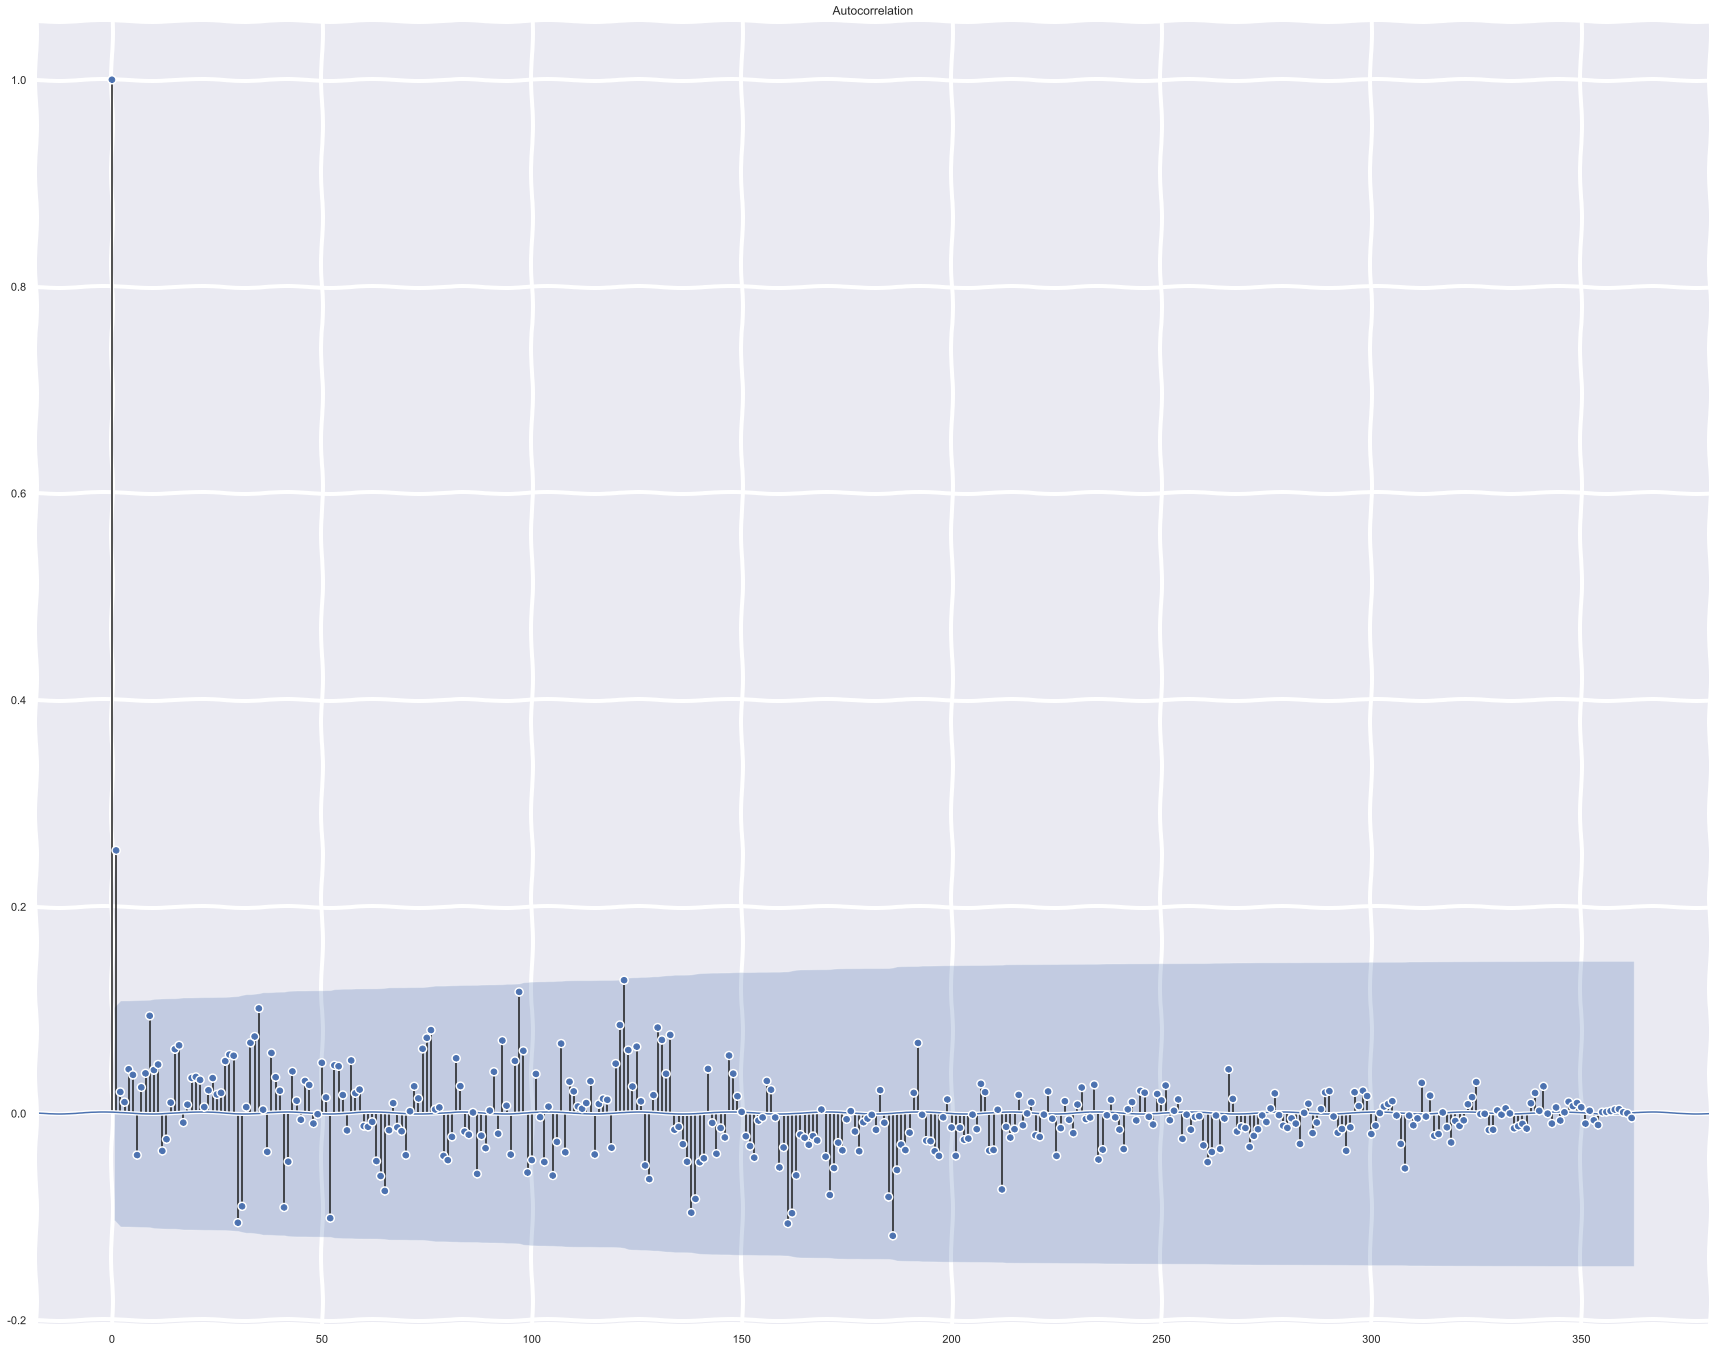

In [260]:
nk = dt['nikkei225']
logDiff_nk = np.log(nk) - np.log(nk.shift()) #対数差分を算出
logDiff_nk = logDiff_nk.dropna() #nanを削除
logDiff_nk

plot_acf(logDiff_nk, lags=362);

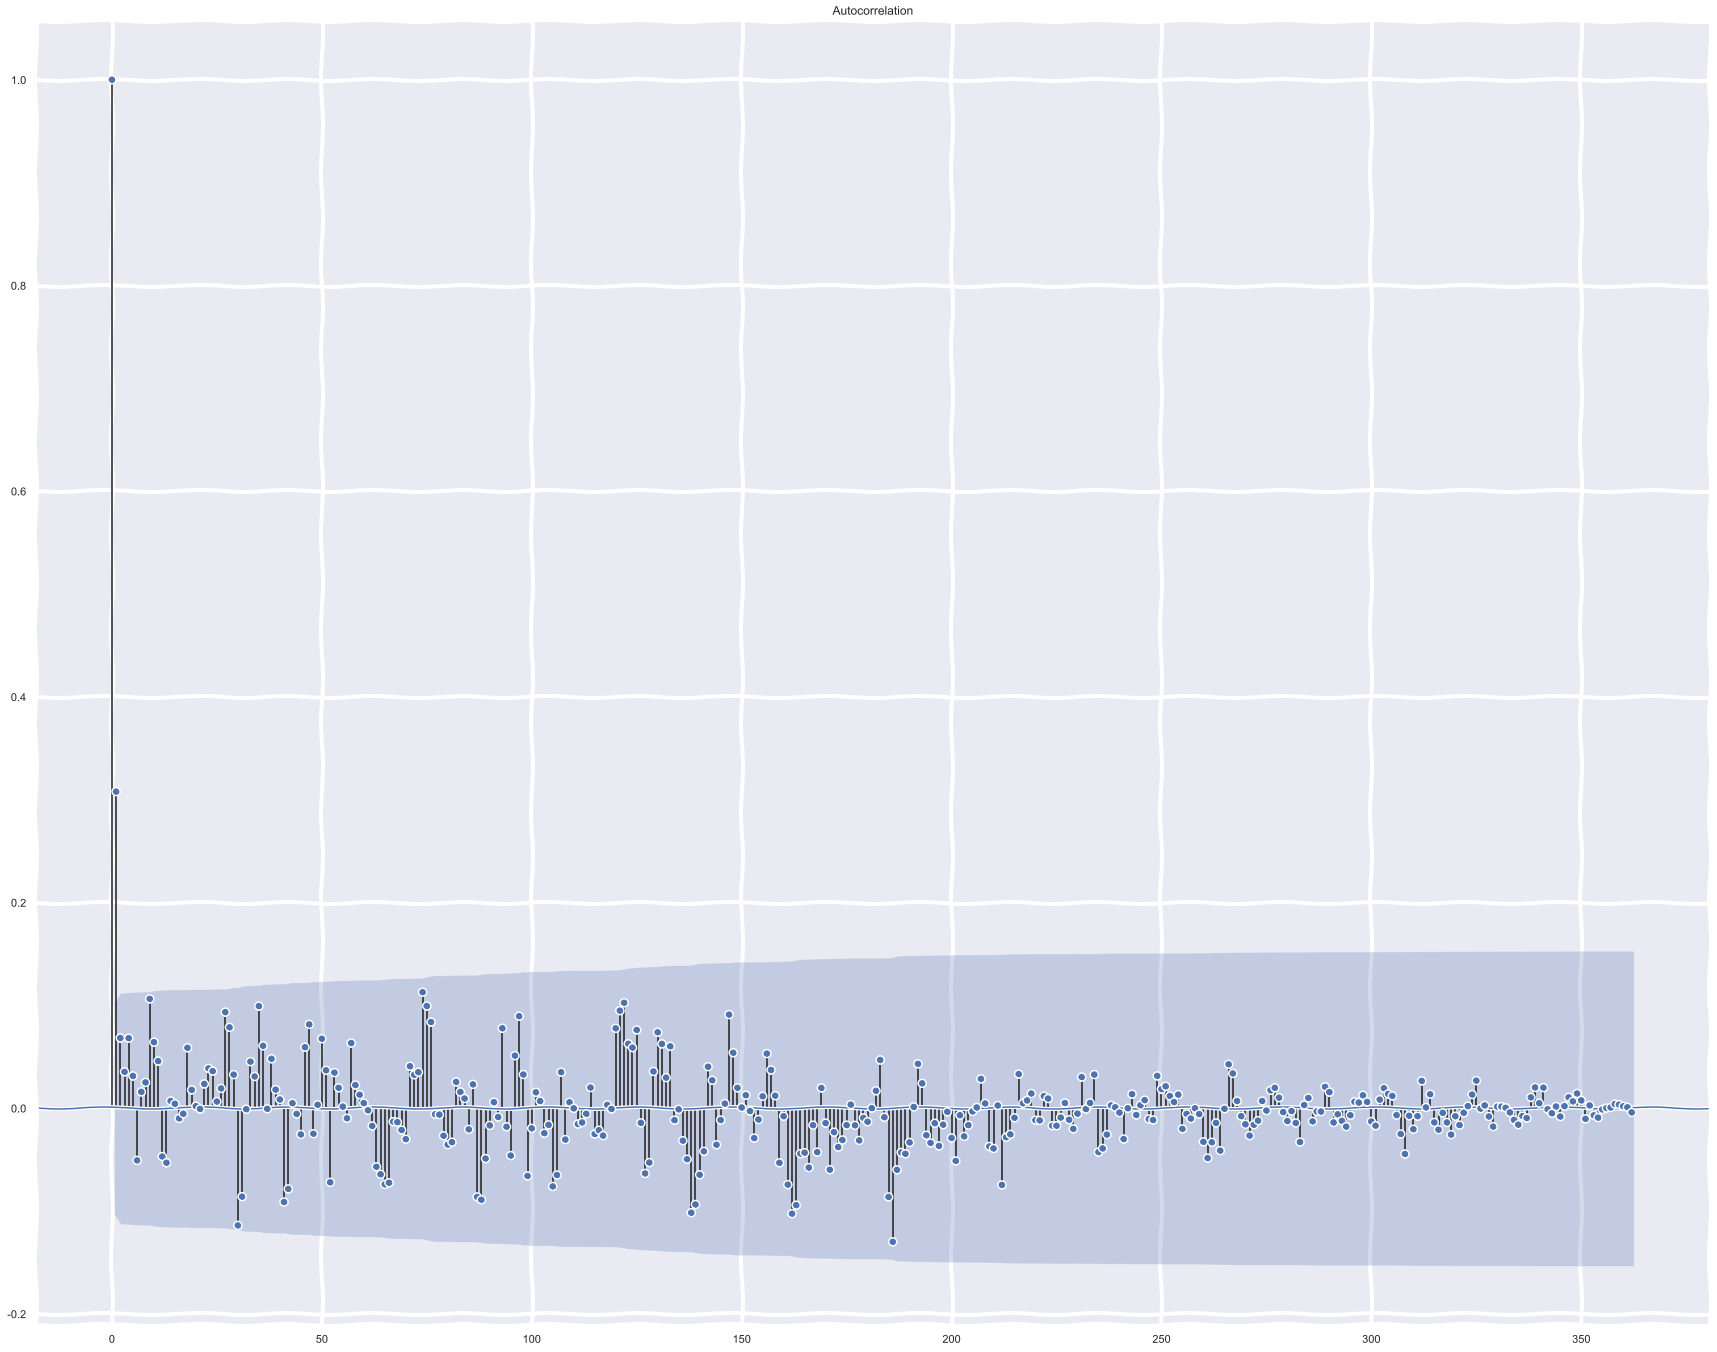

In [261]:
tp = dt['topix']
logDiff_tp = np.log(tp) - np.log(tp.shift()) #対数差分を算出
logDiff_tp = logDiff_tp.dropna() #nanを削除
logDiff_tp

plot_acf(logDiff_tp, lags=362);

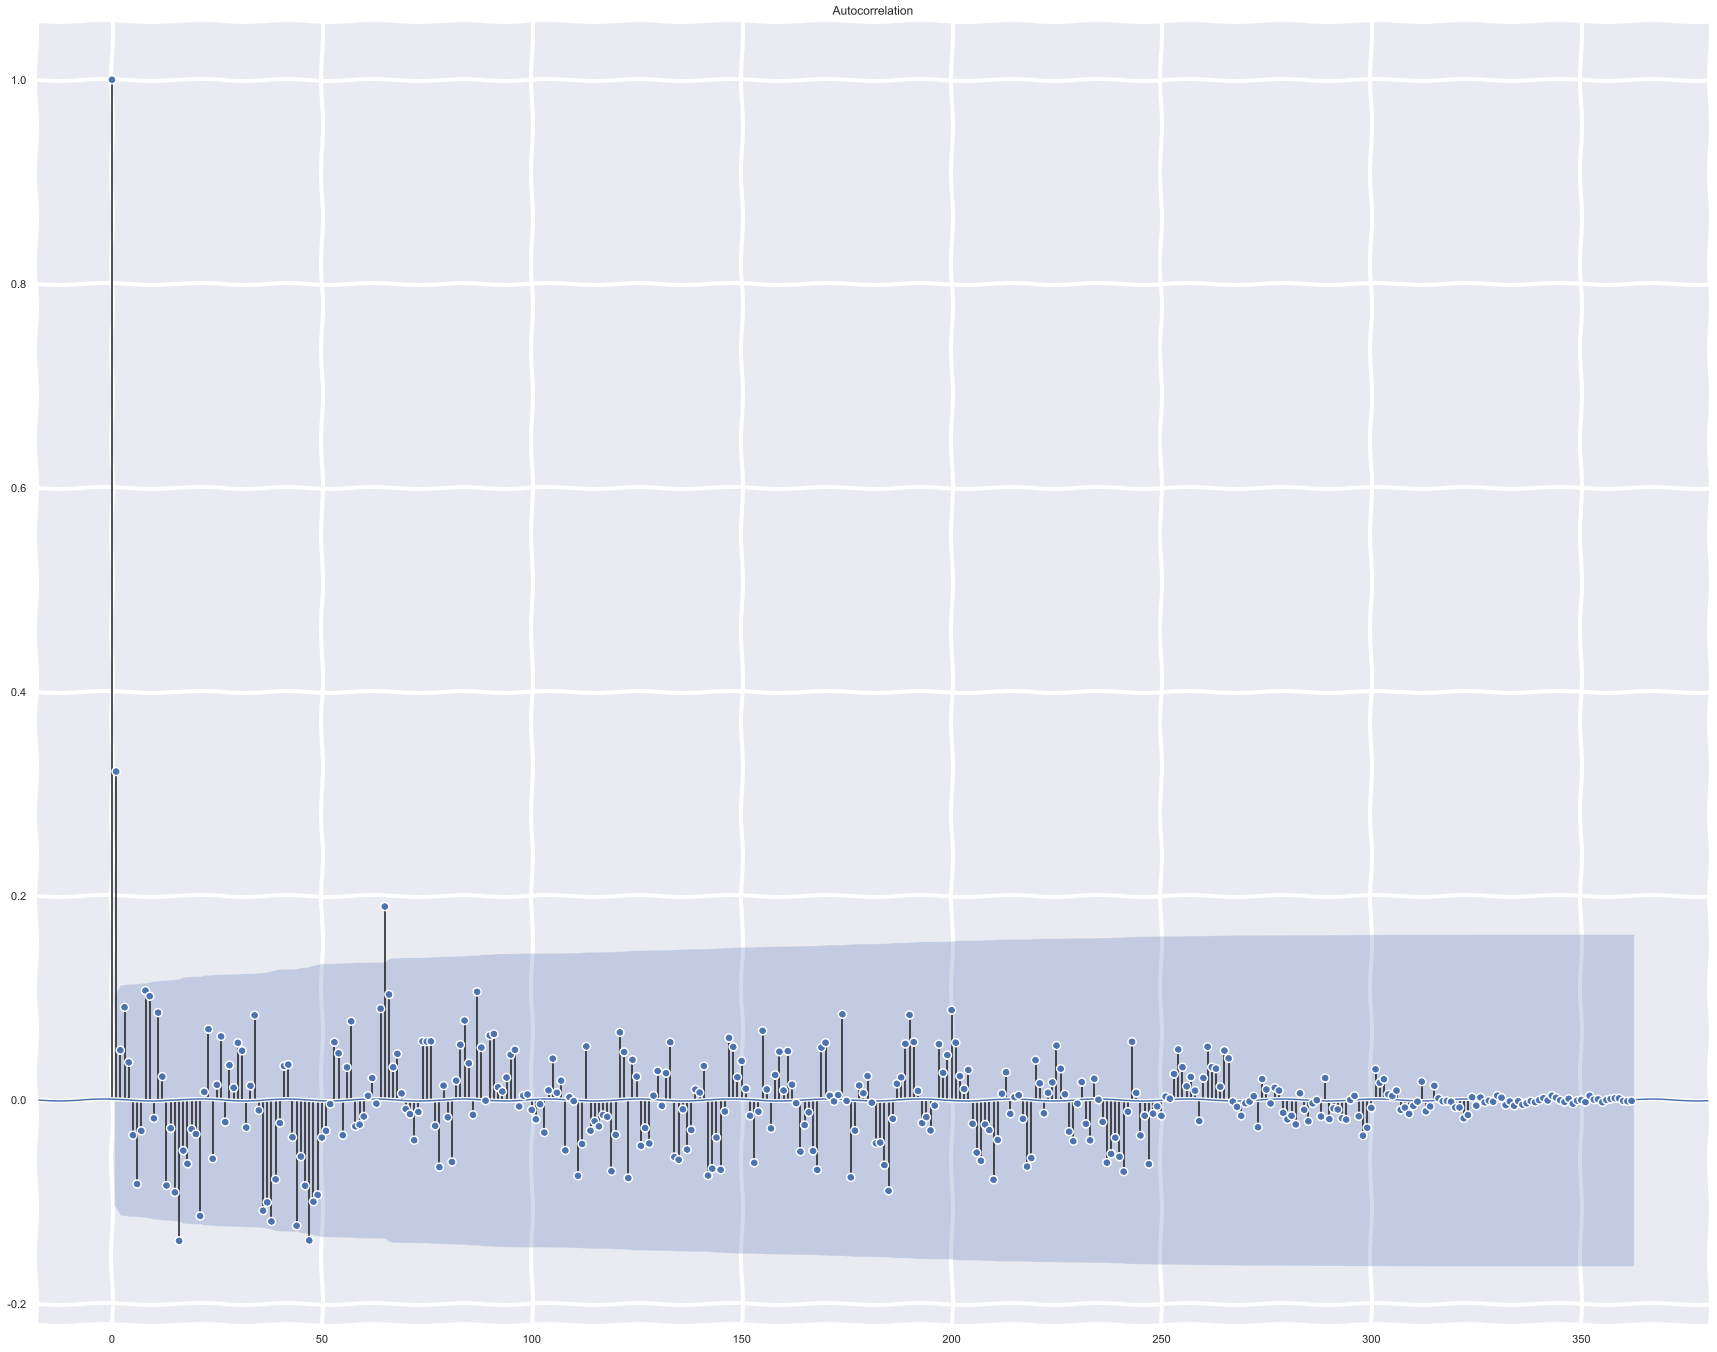

In [263]:
ex = dt['exrate']
logDiff_ex = np.log(ex) - np.log(ex.shift()) #対数差分を算出
logDiff_ex = logDiff_ex.dropna() #nanを削除
logDiff_ex

plot_acf(logDiff_ex, lags=362);

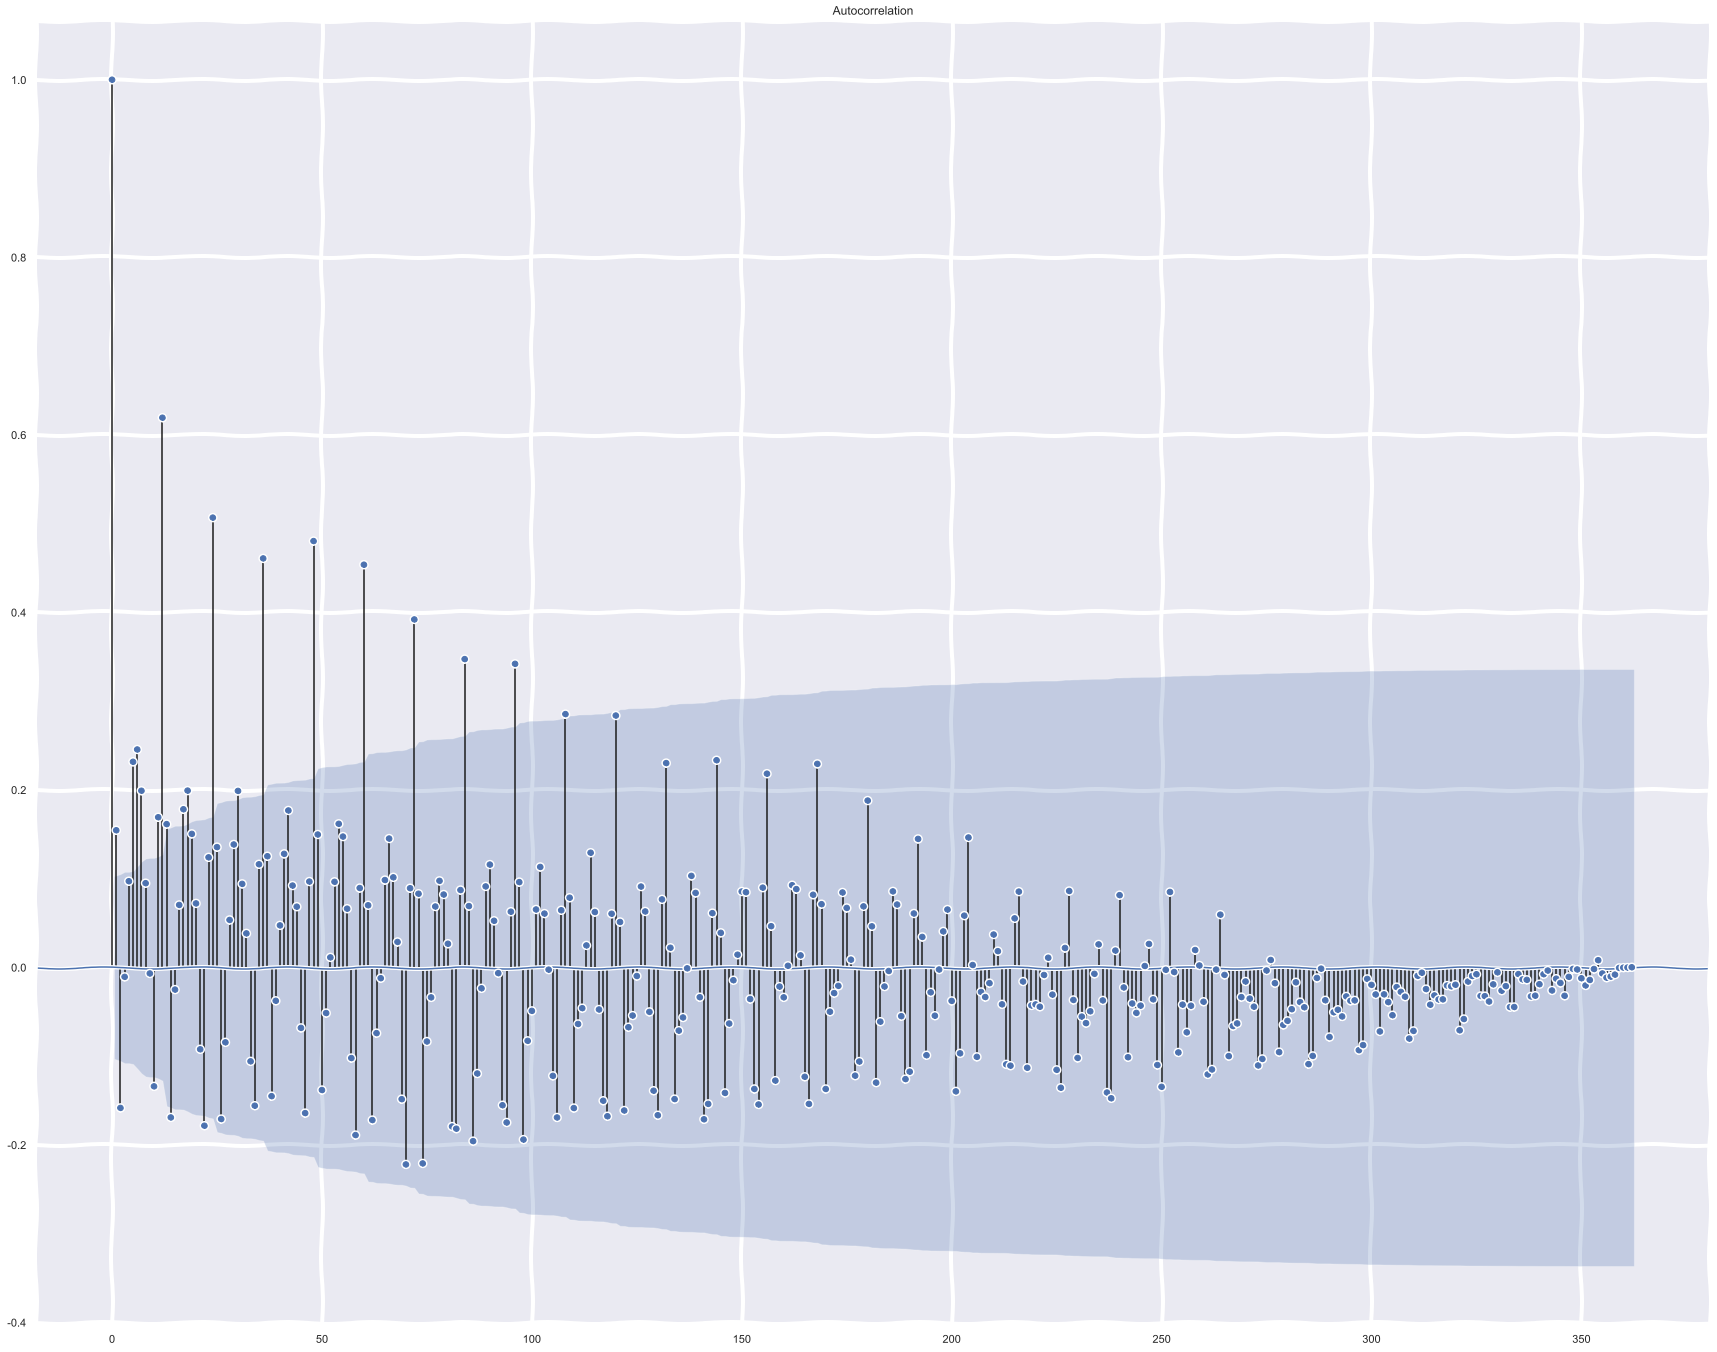

In [264]:
cpi = dt['cpi']
logDiff_cpi = np.log(cpi) - np.log(cpi.shift()) #対数差分を算出
logDiff_cpi = logDiff_cpi.dropna() #nanを削除
logDiff_cpi

plot_acf(logDiff_cpi, lags=362);

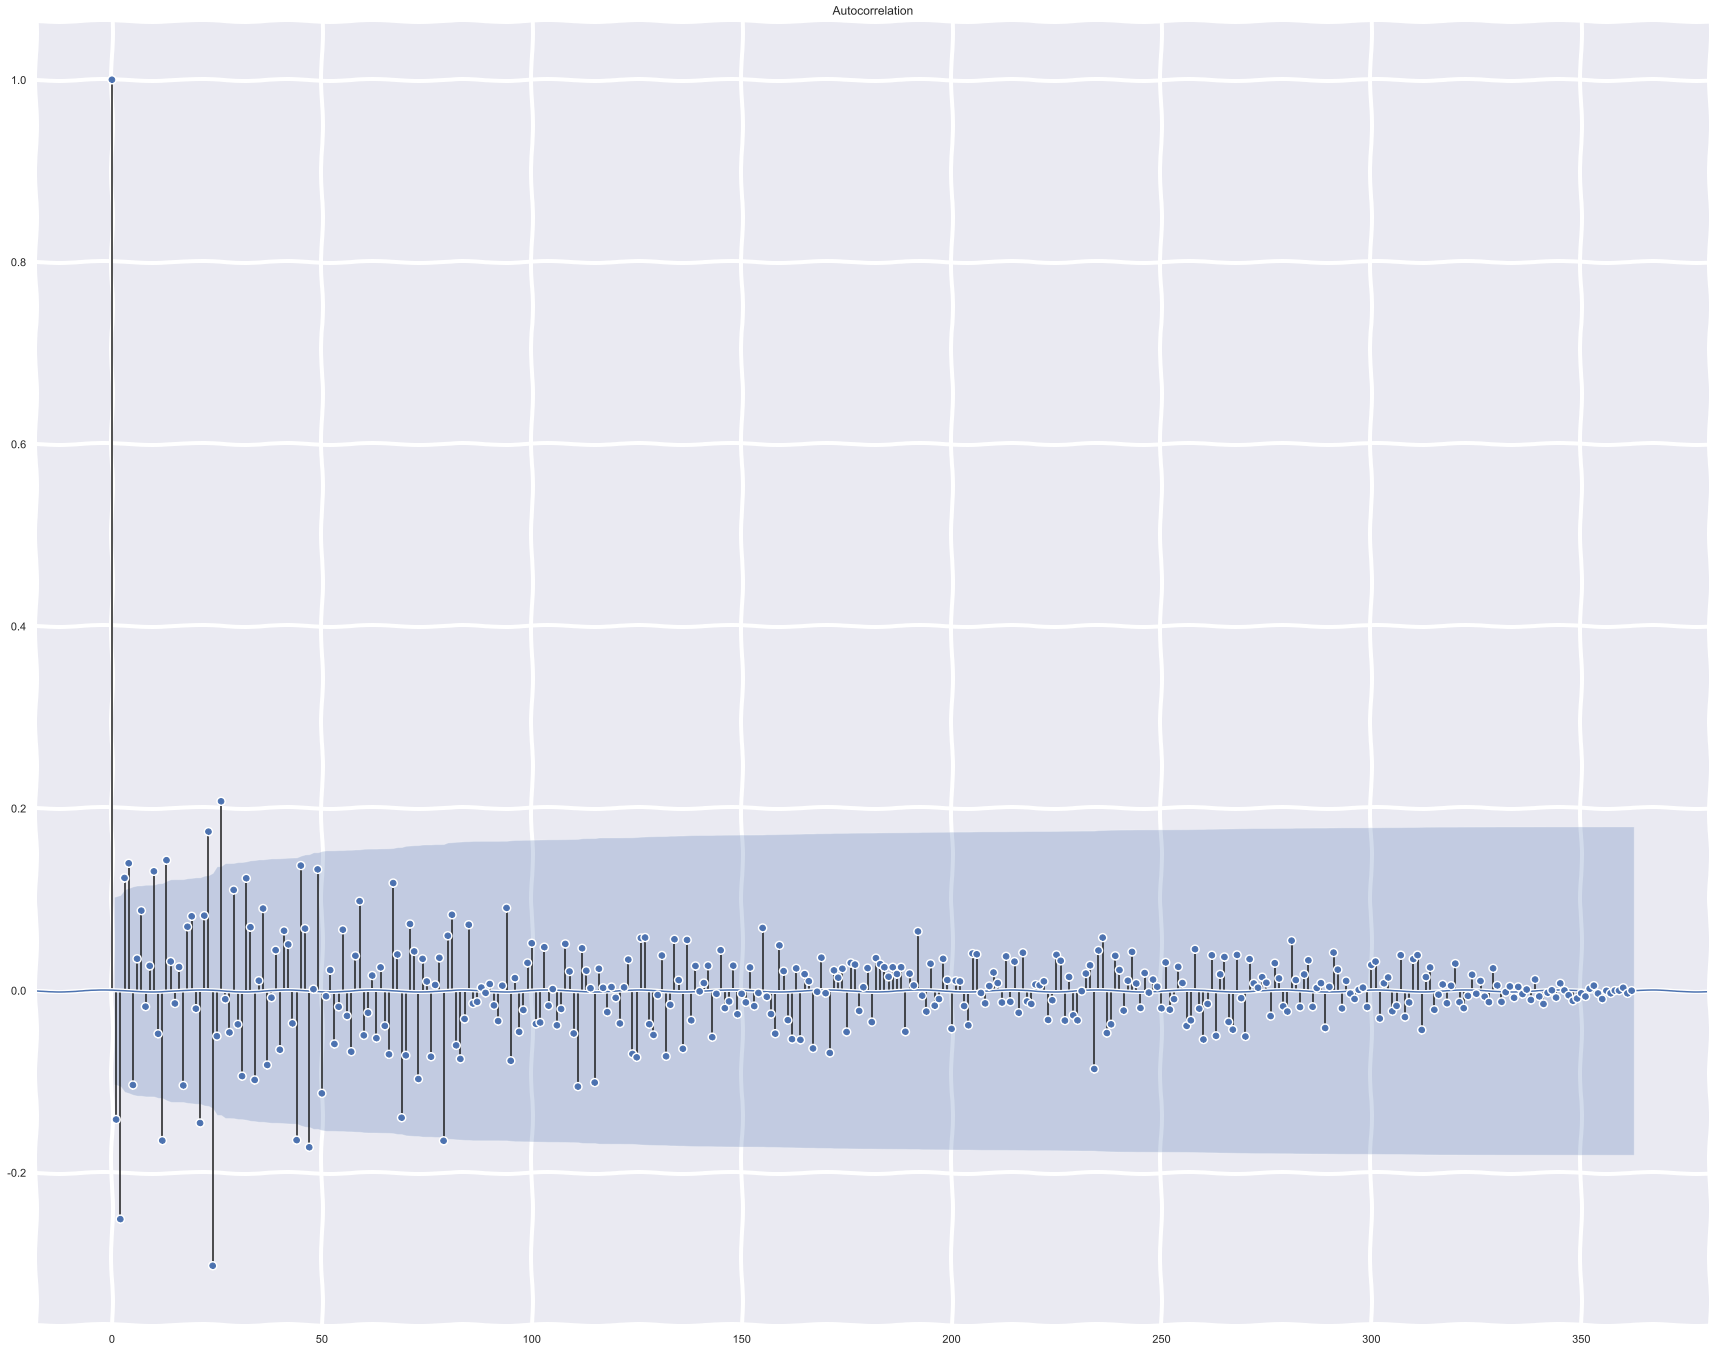

In [265]:
emp = dt['saunemp']
logDiff_emp = np.log(emp) - np.log(emp.shift()) #対数差分を算出
logDiff_emp = logDiff_emp.dropna() #nanを削除
logDiff_emp

plot_acf(logDiff_emp, lags=362);

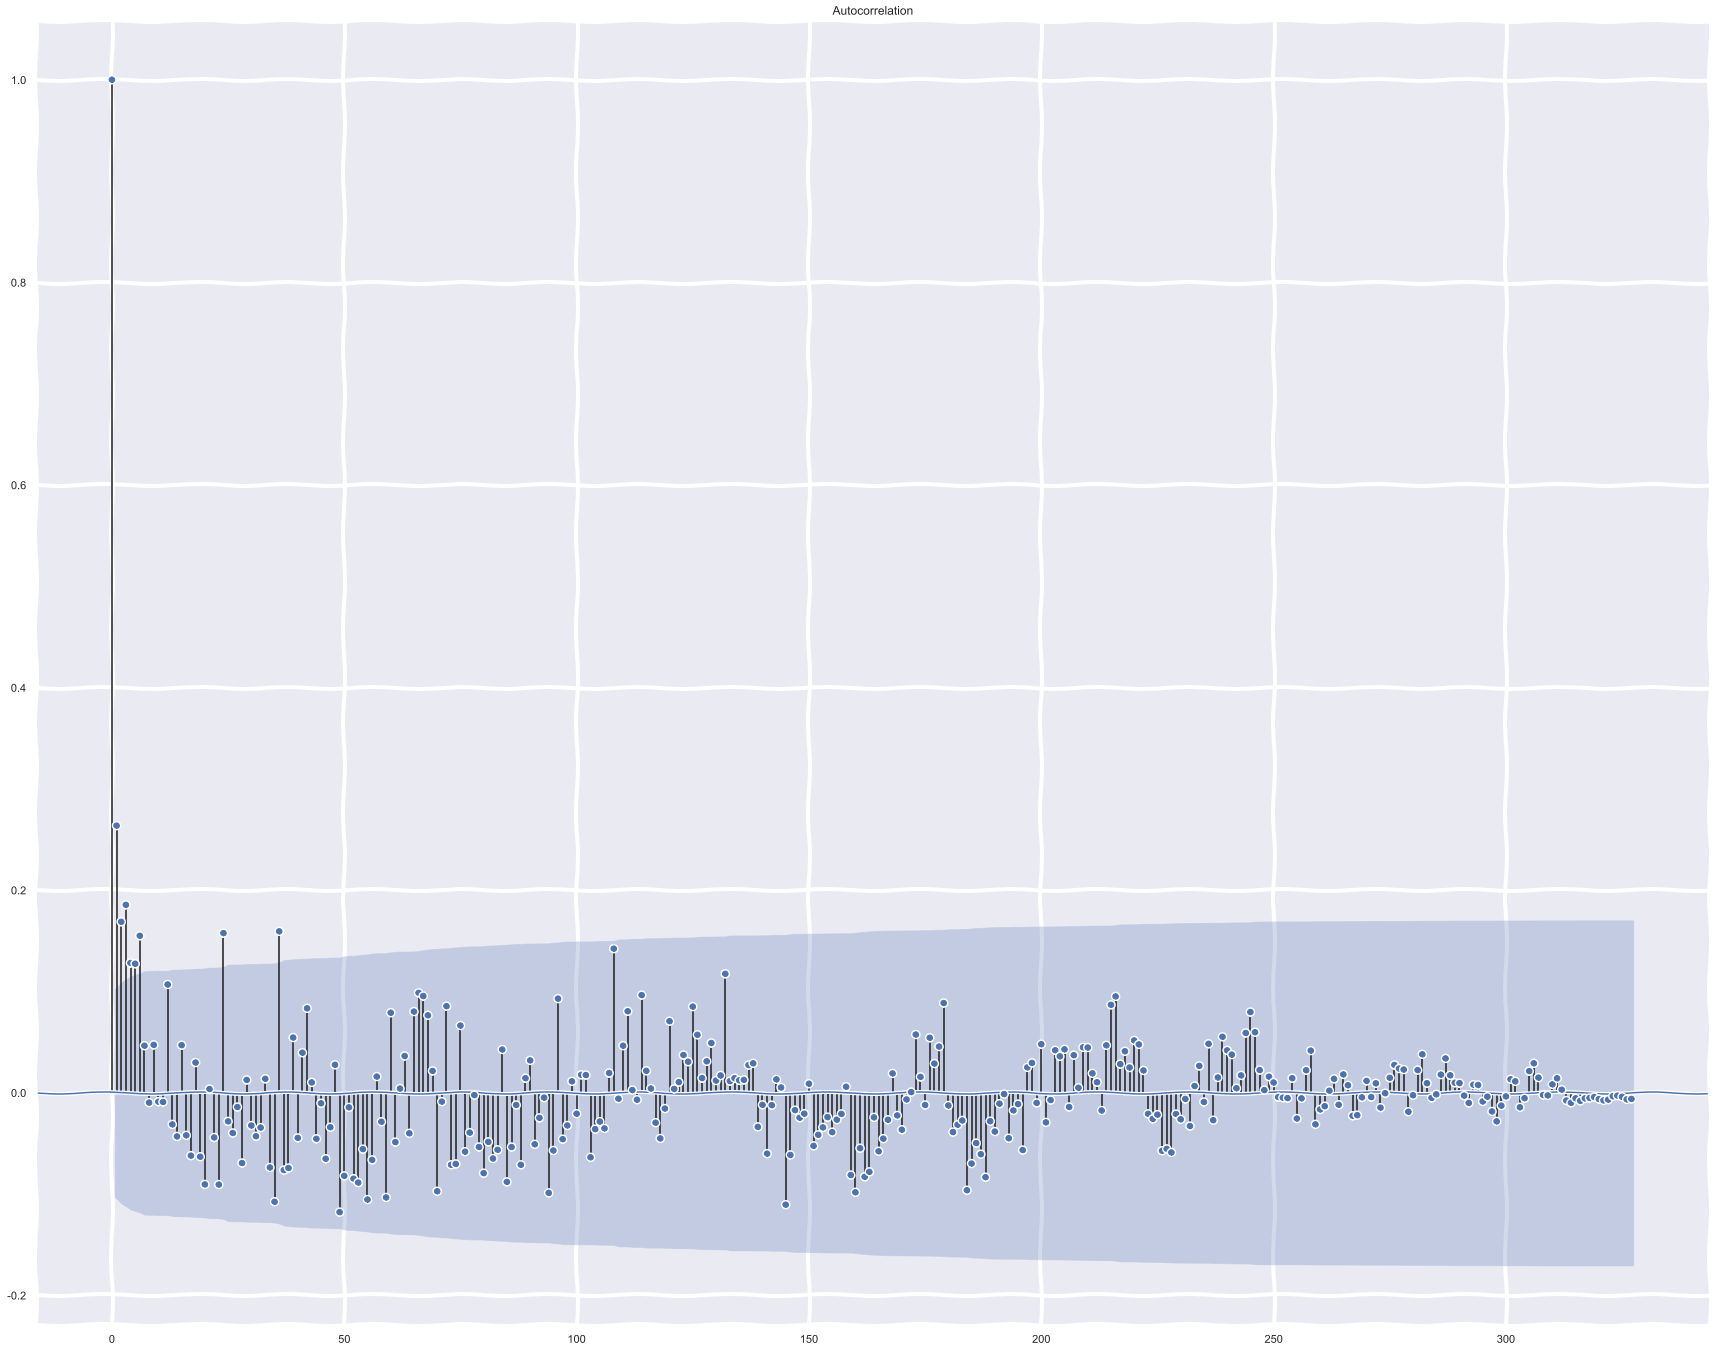

In [293]:
itr = dt['intrate']

#以下、ボツ
#logDiff_itr = np.log(itr) - np.log(itr.shift()) #対数差分を算出
    #numpyで0除算を行うとRuntimeWarningが発生しますが、処理が止まることなく結果が出力され、numpy.infになる
    #https://qiita.com/isuya/items/8a7297cf6e034d1e8fec

#with np.errstate(divide='ignore'):  # withスコープ内のみ制御を適用し、エラーが出る場合を除外
#    logDiff_itr = np.log(itr) - np.log(itr.shift()) 
#logDiff_itr = logDiff_itr.dropna() #nanを削除
#print(logDiff_itr)

#logDiff_itr = logDiff_itr.replace([np.inf, -np.inf], np.nan) #inf(無限大)が生じていたため削除
#logDiff_itr.fillna(0)
#logDiff_itr = logDiff_itr.dropna() #nanを削除
#logDiff_itr

logDiff_itr = np.log1p(itr) - np.log1p(itr.shift()) #対数差分を算出、log1pでinfを回避(log(0+1)となるので)
logDiff_itr = logDiff_itr.dropna() #nanを削除
logDiff_itr

plot_acf(logDiff_itr, lags=327);